In [ ]:
import pandas as pd

# Carregar o db
file_path = "Base de Dados Funcionários.csv"
df = pd.read_csv(file_path)

# View
df.head()


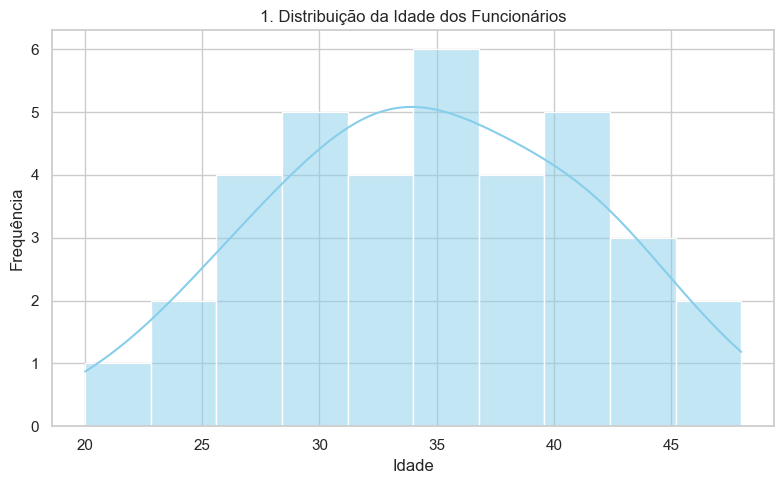

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configs
sns.set(style="whitegrid")

# Converter valores de 'Filhos' para 0 onde for NaN como visto em sala, para ignorar
df['Filhos'] = df['Filhos'].fillna(0)

# Ordenar
instrucao_ordem = ['1o Grau', '2o Grau', 'Superior']
df['Inst'] = pd.Categorical(df['Inst'], categories=instrucao_ordem, ordered=True)

# 1. Distribuição da variável Idade
plt.figure(figsize=(8, 5))
sns.histplot(df['Idade'], bins=10, kde=True, color='skyblue')
plt.title("1. Distribuição da Idade dos Funcionários")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()


## **1. Qual é a distribuição da variável Idade no conjunto de dados?**

**Com base no histograma gerado:** Os funcionários têm idades entre 20 e 48 anos, distribuição é relativamente uniforme, com concentração entre 26-35 anos, com isso a idade média está próxima da mediana, indicando uma distribuição simétrica e o desvio padrão indica uma variação leve nas idades. 

Essa distribuição sugere uma empresa com uma força de trabalho equilibrada em termos de experiência e juventude, mas uma falta de sêniors com idade superior a 50.

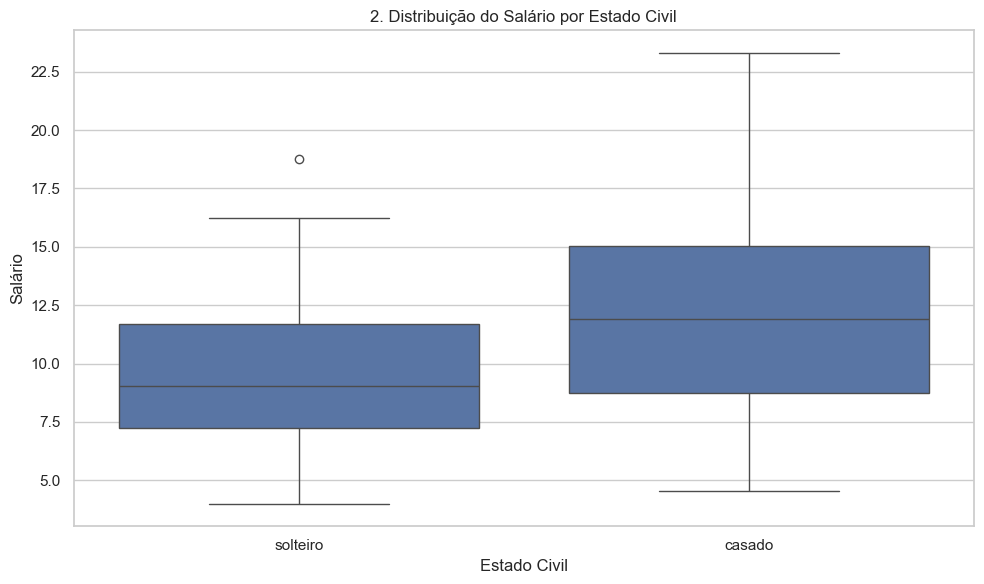

=== ANÁLISE DO SALÁRIO POR ESTADO CIVIL ===
           count       mean       std   min     25%     50%      75%    max
Est.civil                                                                  
casado      20.0  12.123500  4.912026  4.56  8.7425  11.925  15.0300  23.30
solteiro    16.0   9.870625  3.941402  4.00  7.2575   9.045  11.6925  18.75


In [21]:
# 2. Há diferença do Salário entre os diferentes grupos de Estado Civil?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Est.civil', y='Salario', data=df)
plt.title("2. Distribuição do Salário por Estado Civil")
plt.xlabel("Estado Civil")
plt.ylabel("Salário")
plt.tight_layout()
plt.show()

# Análise
print("=== ANÁLISE DO SALÁRIO POR ESTADO CIVIL ===")
print(df.groupby('Est.civil')['Salario'].describe())

## **2. Há diferença do Salário entre os diferentes grupos de Estado Civil?**

**Com base no boxplot e na análise estatística:**

A análise sugere que existe uma diferença salarial entre funcionários solteiros e casados, com os casados tendendo a ter salários ligeiramente superiores, possivelmente devido a fatores como experiência, responsabilidades familiares ou tempo de empresa.

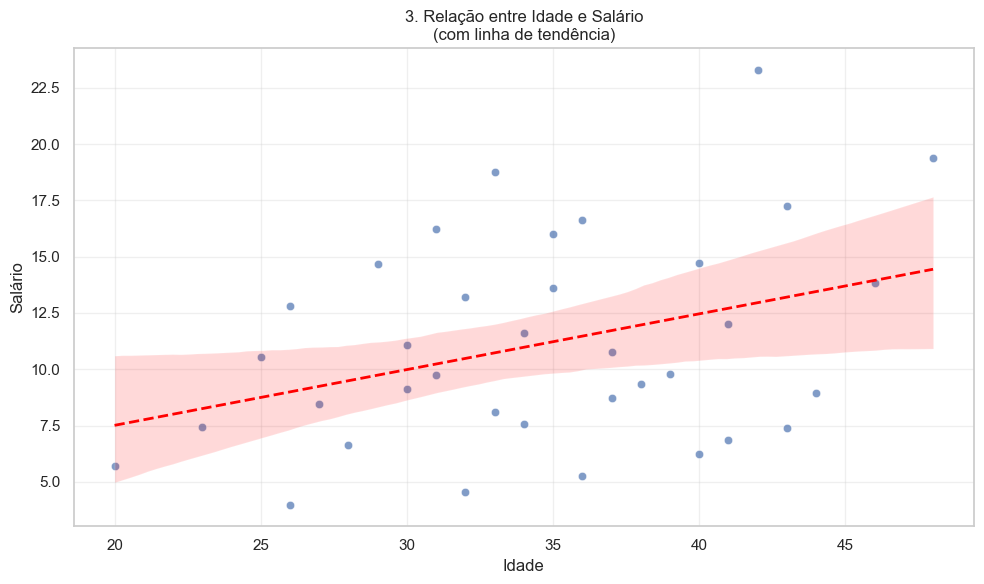

In [22]:
# 3. Existe relação entre Idade e Salário? Mostre através da correlação.
plt.figure(figsize=(10, 6))

# Scatterplot simples mostrando a relação
sns.scatterplot(data=df, x='Idade', y='Salario', alpha=0.7)

# linha de tendência para mostrar a correlação e responder a pergunta mais facil maistardar
sns.regplot(data=df, x='Idade', y='Salario', scatter=False, 
            line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 2})

plt.title("3. Relação entre Idade e Salário\n(com linha de tendência)")
plt.xlabel("Idade")
plt.ylabel("Salário")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## **3. Existe relação entre Idade e Salário? Mostre através da correlação.**

**Com base no gráfico de dispersão e na linha de tendência apresentados:** O scatterplot mostra uma dispersão dos pontos de dados entre idade (20 a 48 anos) e salário (5.000 a 22.500).

A linha vermelha tracejada indica uma tendência geral positiva, sugerindo que à medida que a idade aumenta, o salário tende a aumentar, sendo assim, a correlação é positiva mas não muito forte, pois os pontos estão bem dispersos ao redor da linha de tendência. A área sombreada em vermelho claro mostra a incerteza da relação, indicando que a idade sozinha não é um preditor forte do salário.

Então, sim, existe uma relação positiva entre idade e salário, mas ela é moderada. Funcionários mais velhos tendem a ganhar mais, possivelmente devido à experiência acumulada e tempo de empresa. No entanto, outros fatores (como instrução, região, estado civil) também influenciam significativamente o salário, explicando a dispersão observada nos dados.

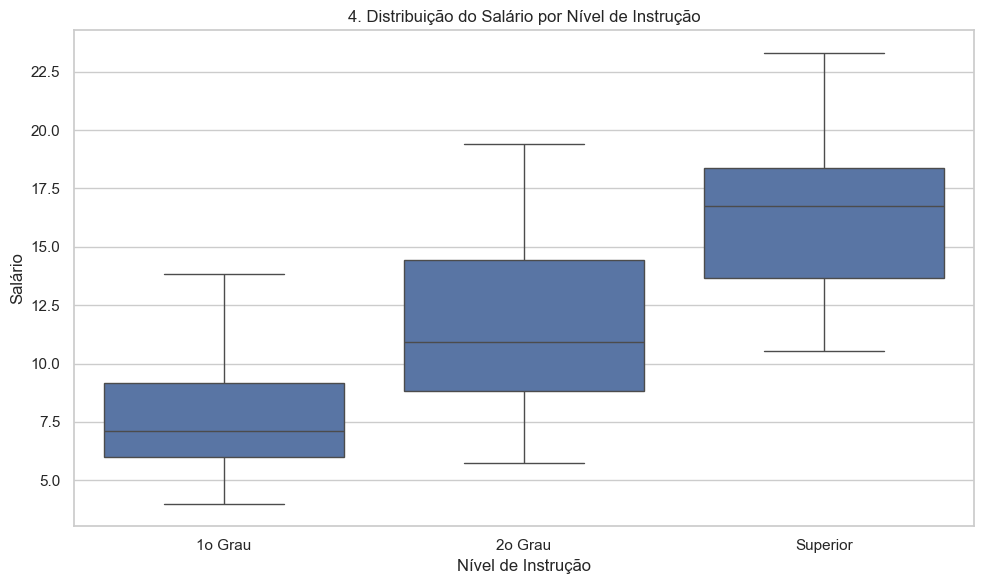

=== ANÁLISE DO SALÁRIO POR INSTRUÇÃO ===
          count       mean       std    min      25%     50%      75%    max
Inst                                                                        
1o Grau    12.0   7.836667  2.956464   4.00   6.0075   7.125   9.1625  13.85
2o Grau    18.0  11.528333  3.715144   5.73   8.8375  10.910  14.4175  19.40
Superior    6.0  16.475000  4.502438  10.53  13.6475  16.740  18.3775  23.30


C:\Users\Byell\AppData\Local\Temp\ipykernel_24608\296358174.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Inst')['Salario'].describe())


In [24]:
# 4. Funcionários com maior Instrução tendem a ter um salário maior?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Inst', y='Salario', data=df)
plt.title("4. Distribuição do Salário por Nível de Instrução")
plt.xlabel("Nível de Instrução")
plt.ylabel("Salário")
plt.tight_layout()
plt.show()

# Análise estatística
print("=== ANÁLISE DO SALÁRIO POR INSTRUÇÃO ===")
print(df.groupby('Inst')['Salario'].describe())

## **4. Funcionários com maior Instrução tendem a ter um salário maior?**

**Com base no boxplot e na análise estatística apresentados:**

O gráfico mostra uma progressão ascendente dos salários conforme aumenta o nível de instrução. Há uma evolução positiva e consistente nos valores salariais e as médias, medianas e quartis superiores aumentam progressivamente com a instrução, sendo assim funcionários com ensino superior apresentam maior variabilidade salarial, mas com valores mínimos mais altos.

Então, sim, existe uma relação positiva e clara entre nível de instrução e salário. Confirmando a importância da qualificação educacional para a remuneração no mercado de trabalho. Esta tendência é consistente com a teoria do capital humano.

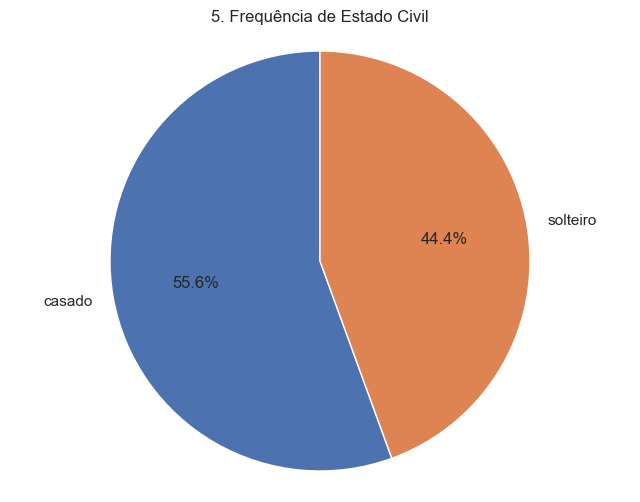

=== FREQUÊNCIA DE ESTADO CIVIL ===
Est.civil
casado      20
solteiro    16
Name: count, dtype: int64


In [25]:
# 5. Como é a frequência de Estado Civil?
plt.figure(figsize=(8, 6))
estado_civil_counts = df['Est.civil'].value_counts()
plt.pie(estado_civil_counts.values, labels=estado_civil_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("5. Frequência de Estado Civil")
plt.axis('equal')
plt.show()

print("=== FREQUÊNCIA DE ESTADO CIVIL ===")
print(estado_civil_counts)

## **5. Como é a frequência de Estado Civil?**

**Com base no gráfico de pizza e na contagem apresentados:** O gráfico mostra a distribuição percentual dos funcionários entre as duas categorias de estado civil, solteiros e casados. A análise revela que os funcionários casados representam 55.6% do total, enquanto os solteiros correspondem a 44.4%. Esta distribuição indica o perfil demográfico predominante na empresa, mostrando uma força de trabalho com maioria de funcionários casados.

Sendo assim, a frequência de estado civil na empresa apresenta uma distribuição relativamente equilibrada, com leve predominância de funcionários casados (55.6% vs 44.4%). Esta informação é relevante para o planejamento de benefícios, políticas de recursos humanos e compreensão da composição da equipe, sugerindo que a empresa pode ter funcionários com responsabilidades familiares.

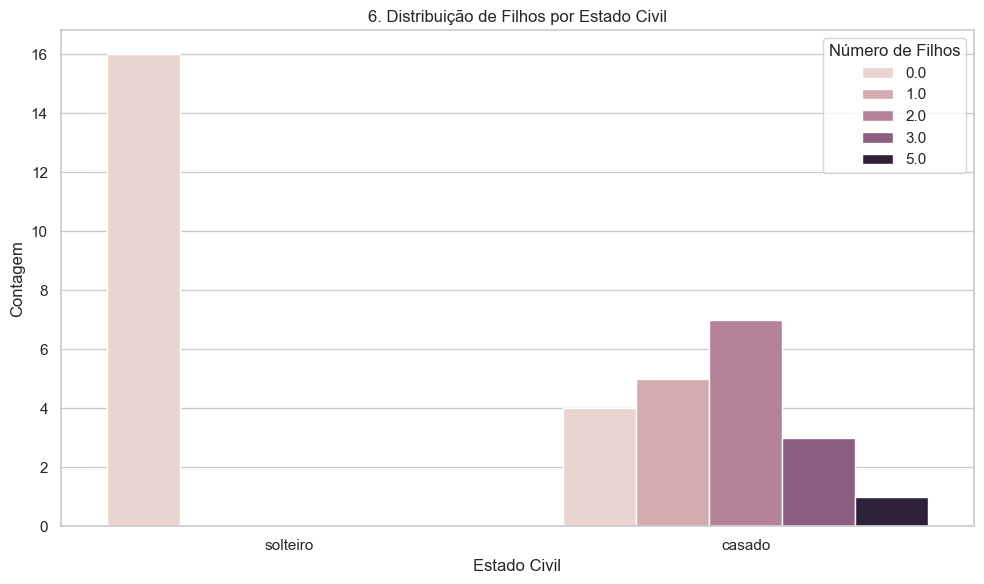

=== ANÁLISE DE FILHOS POR ESTADO CIVIL ===
Filhos     0.0  1.0  2.0  3.0  5.0
Est.civil                         
casado       4    5    7    3    1
solteiro    16    0    0    0    0


In [26]:
# 6. Análise adicional: Distribuição de Filhos por Estado Civil
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Est.civil', hue='Filhos')
plt.title("6. Distribuição de Filhos por Estado Civil")
plt.xlabel("Estado Civil")
plt.ylabel("Contagem")
plt.legend(title="Número de Filhos")
plt.tight_layout()
plt.show()

print("=== ANÁLISE DE FILHOS POR ESTADO CIVIL ===")
print(df.groupby(['Est.civil', 'Filhos']).size().unstack(fill_value=0))

## **6. Análise adicional: Distribuição de Filhos por Estado Civil**

**Com base no gráfico de barras agrupadas apresentado:** O gráfico mostra a distribuição do número de filhos entre os diferentes grupos de estado civil, revelando padrões interessantes na composição familiar dos funcionários. A análise revela que todos os 16 funcionários solteiros não possuem filhos (0 filhos), enquanto os funcionários casados apresentam uma distribuição diversificada: 4 têm 0 filhos, 5 têm 1 filho, 7 têm 2 filhos (maior grupo até então), 3 têm 3 filhos e 1 tem 5 filhos. Esta distribuição indica uma forte correlação entre estado civil e presença de filhos. Sendo solteiros, sem muitas responsabilidades familiares.

Então, a análise revela uma correlação quase perfeita: funcionários solteiros não possuem filhos, enquanto os casados apresentam uma variedade de configurações familiares. Esta informação é valiosa, novamente, assim como na 5ta questão, para o planejamento de benefícios familiares, políticas de recursos humanos e compreensão do perfil demográfico da empresa, mostrando que a maioria dos funcionários casados (80%) possui pelo menos um filho. enquanto os solteiros possuem mais "liberdade", no aspecto que não possuem vínculos e responsabilidades familiares.